In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Inversi Linear menggunakan regresi

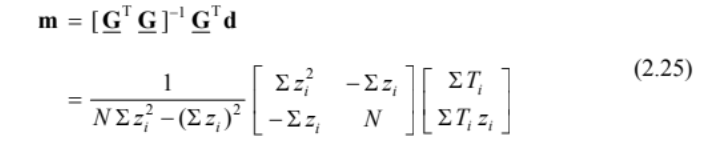

General Inversion with Regression <br>
$m = [G^TG]^{-1}G^T d$

Temperature proportional with Depth <br>
$T = m_1 + m_{2}z$ <br>

Finding model using inversion with regression <br>
$
m = 
\frac{1}{N\sum{{z_i}^2} - (\sum{z_i})^2}
{\left[\begin{array}{cc}
\sum{z_i}^2  & -\sum{z_i}   \\
-\sum{z_i}    & N
\end{array}\right]}$
${\left[\begin{array}{cc}
\sum{T_i}\\
\sum{T_i z_i}
\end{array}\right]}$

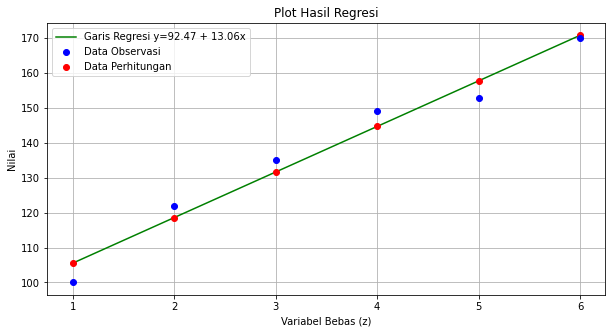

In [48]:
def sigma(f,list_):
    total = [f(i) for i in list_]
    return sum(total)

def sigma_2(f,list_):
    total = [f(i,j) for i,j in list_]
    return sum(total)

#Data Observasi
d_obs = [100,122,135,149,153,170]

#Variabel Bebas
z = [1,2,3,4,5,6]

#Jumlah Data
N=len(z)

#Perhitungan parameter model (m[0]=m1 dan m[1]=m2)
m= 1/(N*sigma(lambda x: x**2,z) - sigma(lambda x:x,z)**2)\
*np.mat([[sigma(lambda x: x**2,z) , -1*sigma(lambda x:x,z)],
        [-1*sigma(lambda x:x,z)  , N]])\
@np.mat([[sigma(lambda x: x,d_obs)],
        [sigma_2(lambda x,y:x*y,zip(z,d_obs))]])

# Data hasil perhitungan
d_cal = m[0]+ m[1]*z

#Visualisasi
plt.figure(figsize=(10,5))
plt.scatter(z,d_obs,c='b', label='Data Observasi',zorder=4)
plt.scatter(z,d_cal.tolist()[0],c='r', label='Data Perhitungan',zorder=3)
plt.plot(z,d_cal.tolist()[0],color='g',
         label= 'Garis Regresi y={:.2f} + {:.2f}x'.format((m[0].tolist()[0][0]),(m[1].tolist()[0][0])),zorder=2)
plt.legend()
plt.grid(zorder=1)
plt.title('Plot Hasil Regresi')
plt.xlabel('Variabel Bebas (z)')
plt.ylabel('Nilai')
plt.savefig('Regresi.png')
plt.show()


In [49]:
d_cal.tolist()

[[105.52380952380955,
  118.5809523809524,
  131.63809523809525,
  144.6952380952381,
  157.75238095238095,
  170.8095238095238]]

In [11]:
#after getting model using inversion, then doing forward modelling to get response model
y = m[0]+ m[1]*z

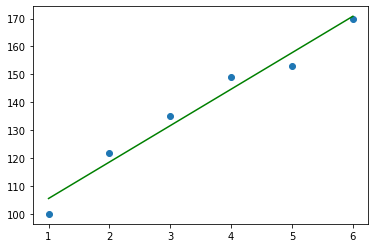

In [12]:
plt.scatter(z,d_obs)
plt.plot(z,y.tolist()[0],color='g')